# Lead Score Analysis By Ishan Pandey & Bikash Mishra

## Following steps are performed during the analysis.

#### Step 1: Reading and Understanding Data
#### Step 2: Data Cleaning
#### Step 3: Data Visualization
#### Step 4: Data Preparation
#### Step 5: Building the model
#### Step 6: Making Predictions Using the Final Model
#### Step 7: Model Evaluation

In [1]:
# Importing all the libraries required for this analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

#Importing train_test_split 
from sklearn.model_selection import train_test_split

# Importing StandardScaler 
from sklearn.preprocessing import StandardScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Importing statsmodel
import statsmodels.api as sm 

# Importing VIF for calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing r2_score for calculation
from sklearn.metrics import r2_score 

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## Step 1: Reading and Understanding Data

In [2]:
# Importing dataset
Leads_data= pd.read_csv("Leads.csv")

In [3]:
Leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
Leads_data.shape

(9240, 37)

In [5]:
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Checking percentage of null values in each column

In [6]:
(100 * Leads_data.isnull().sum()/len(Leads_data)).round(2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Checking the unique data

In [7]:
Leads_data.select_dtypes(include='object').apply(pd.Series.nunique, axis = 0)

Prospect ID                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations                             2
Receive More Updates About O

In [8]:
Leads_data.select_dtypes(include='number').apply(pd.Series.nunique, axis = 0)

Lead Number                    9240
Converted                         2
TotalVisits                      41
Total Time Spent on Website    1731
Page Views Per Visit            114
Asymmetrique Activity Score      12
Asymmetrique Profile Score       10
dtype: int64

## Step 2: Data Cleaning

### Dropping columns and Rows

#### Dropping the missing value columns having more than 40%

In [9]:
Leads_data=Leads_data.loc[:, Leads_data.isnull().mean() <=0.4]

In [10]:
Leads_data.shape

(9240, 32)

##### Dropping categorical columns having only 1 value in the entire column
    1.Magazine
    2.Receive More Updates About Our Courses
    3.Get updates on DM Content
    4.Update me on Supply Chain Content
    5.I agree to pay the amount through cheque

In [11]:
Leads_data.drop(['Magazine','Receive More Updates About Our Courses','Get updates on DM Content','Update me on Supply Chain Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

##### Following columns are unique ID columns
    1. Lead Number
    2. Prospect ID

In [12]:
Leads_data.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

#### Following columns are generated by Sales team post their interaction with Prospect so they should be dropped as these info/data will not be available to our model when it will be deployed for future hot lead identification
Note: Some of the sales columns already got dropped earlier as part of data cleaning.

In [13]:
Leads_data.drop(['Tags','Last Activity','Last Notable Activity','Lead Profile'],axis=1,inplace=True)

In [14]:
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Country                                        6779 non-null   object 
 9   Specialization                                 7802 

### Handling categorical columns having skewed values

In [15]:
Leads_data.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Germany                    4
Kuwait                     4
South Africa               4
Canada                     4
Sweden                     3
Netherlands                2
China                      2
Ghana                      2
Italy                      2
Uganda                     2
Asia/Pacific Region        2
Bangladesh                 2
Philippines                2
Belgium                    2
Indonesia                  1
Denmark                    1
Vietnam                    1
Russia                     1
Switzerland                1
Malaysia                   1
Sri Lanka     

In [16]:
Leads_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [17]:
Leads_data['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [18]:
Leads_data['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

### Dropping columns  
#### Followings are skewed columns,won't add any value to the model
    1. Country
    2. What matters most to you in choosing a course
#### After replcaing the select to null values, the percentage of null value increases i.e. >40%
    3. City
    4. How did you hear about X Education

In [19]:
Leads_data.drop(['Country','What matters most to you in choosing a course','City','How did you hear about X Education'],axis=1,inplace=True)

#### Checking percentage of nulls in available columns

In [20]:
(100 * Leads_data.isnull().sum()/len(Leads_data)).round(2)

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Specialization                            15.56
What is your current occupation           29.11
Search                                     0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
A free copy of Mastering The Interview     0.00
dtype: float64

#### Impute missing values with mode for the categorical data and median for numerical data

In [21]:
Leads_data.fillna(Leads_data.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [22]:
Leads_data.fillna(Leads_data.select_dtypes(include='number').median().iloc[0], inplace=True)

In [23]:
(100 * Leads_data.isnull().sum()/len(Leads_data)).round(2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [24]:
Leads_data['Specialization'].value_counts()

Select                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
Leads_data['Specialization'] = Leads_data['Specialization'].replace('Select','Fresher')

### Replace following columns to reduce number of categories as these contain very few values
    1. In 'Lead Origin' column, replacing Lead Add Form, Lead Import, Quick Add Form with "Lead Form/Import" 
    2. In 'Lead Source' column, replacing Welingak Website,Referral Sites,Facebook,google,Click2call,bing,Social Media,Live    Chat,Press_Release,NC_EDM,testone,blog,youtubechannel,welearnblog_Home,WeLearn,Pay per Click Ads with "Others"
    3. Replaced select in specialisation column with ‘freshers’ as we think this correctly reflects the people who would not mark any specialisation in the form.
    4. In 'What is your current occupation' column,replacing less than 3% values with "Student & Others"

In [26]:
Leads_data['Specialization']=Leads_data['Specialization'].replace(['International Business','Healthcare Management','E-COMMERCE','Retail Management','Rural and Agribusiness','E-Business','Services Excellence'],'Others')
Leads_data['Lead Source']=Leads_data['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','google','Click2call','bing','Social Media','Live Chat','Press_Release','NC_EDM','testone','blog','youtubechannel','welearnblog_Home','WeLearn','Pay per Click Ads'],'Others')
Leads_data['Lead Origin']=Leads_data['Lead Origin'].replace(['Lead Add Form','Lead Import','Quick Add Form'],'Lead Form/Import')
Leads_data['What is your current occupation']=Leads_data['What is your current occupation'].replace(['Student','Other','Housewife','Businessman'],'Student & Others')

In [27]:
Leads_data.select_dtypes(include='number').apply(pd.Series.nunique, axis = 0)

Converted                         2
TotalVisits                      41
Total Time Spent on Website    1731
Page Views Per Visit            114
dtype: int64

In [28]:
Leads_data.select_dtypes(include='object').apply(pd.Series.nunique, axis = 0)

Lead Origin                                3
Lead Source                                6
Do Not Email                               2
Do Not Call                                2
Specialization                            13
What is your current occupation            3
Search                                     2
Newspaper Article                          2
X Education Forums                         2
Newspaper                                  2
Digital Advertisement                      2
Through Recommendations                    2
A free copy of Mastering The Interview     2
dtype: int64

In [29]:
(Leads_data['Do Not Email'].value_counts()/len(Leads_data)).round(2)

No     0.92
Yes    0.08
Name: Do Not Email, dtype: float64

In [30]:
(Leads_data['Do Not Call'].value_counts()/len(Leads_data)).round(2)

No     1.0
Yes    0.0
Name: Do Not Call, dtype: float64

In [31]:
(Leads_data['Search'].value_counts()/len(Leads_data)).round(3)

No     0.998
Yes    0.002
Name: Search, dtype: float64

In [32]:
(Leads_data['Newspaper Article'].value_counts()/len(Leads_data)).round(3)

No     1.0
Yes    0.0
Name: Newspaper Article, dtype: float64

In [33]:
(Leads_data['X Education Forums'].value_counts()/len(Leads_data)).round(3)

No     1.0
Yes    0.0
Name: X Education Forums, dtype: float64

In [34]:
(Leads_data['Newspaper'].value_counts()/len(Leads_data)).round(3)

No     1.0
Yes    0.0
Name: Newspaper, dtype: float64

In [35]:
(Leads_data['Digital Advertisement'].value_counts()/len(Leads_data)).round(3)

No     1.0
Yes    0.0
Name: Digital Advertisement, dtype: float64

In [36]:
(Leads_data['Through Recommendations'].value_counts()/len(Leads_data)).round(3)

No     0.999
Yes    0.001
Name: Through Recommendations, dtype: float64

### Dropping the following columns due to highly skewness
    1.Search
    2.Newspaper Article
    3.X Education Forums
    4.Newspaper
    5.Digital Advertisement 
    6.Through Recommendations 
    7.Do Not Call

In [37]:
Leads_data.drop(['Search','Newspaper Article','Do Not Call','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)

In [38]:
Leads_data['Converted'].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

### Converting categorical variable to numerical variable (binary) - (Yes/No) to (1/0)

In [39]:
Leads_data = Leads_data.replace(to_replace = "Yes", value = 1)
Leads_data = Leads_data.replace(to_replace = "No", value = 0)

In [40]:
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Specialization                          9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 722.0+ KB


## Step 3: Data Visualization

### Checking Outliers

In [41]:
Leads_data.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.385390,3.394156,487.698268,2.327787,0.312554
std,0.270435,0.486714,4.836682,548.021466,2.164258,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000
75%,0.000000,1.000000,5.000000,936.000000,3.000000,1.000000
max,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000


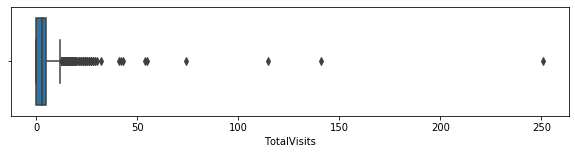

In [42]:
plt.figure(figsize=(10,2))
sns.boxplot(Leads_data.TotalVisits)
plt.show()

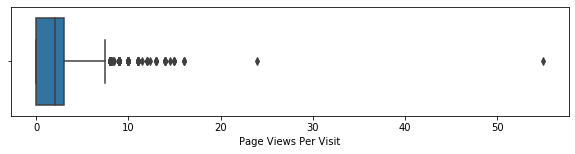

In [43]:
plt.figure(figsize=(10,2))
sns.boxplot(Leads_data['Page Views Per Visit'])
plt.show()

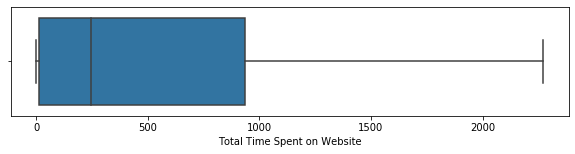

In [44]:
plt.figure(figsize=(10,2))
sns.boxplot(Leads_data['Total Time Spent on Website'])
plt.show()

### Handling Outliers

In [45]:
# Excluding values outside 99th percentile in 'TotalVisits' & 'Page Views Per Visit' variables
Leads_data=Leads_data[Leads_data['TotalVisits']<np.nanpercentile(Leads_data['TotalVisits'], 99)]
Leads_data=Leads_data[Leads_data['Page Views Per Visit']<np.nanpercentile(Leads_data['Page Views Per Visit'], 99)]

### Checking Correlation between variables

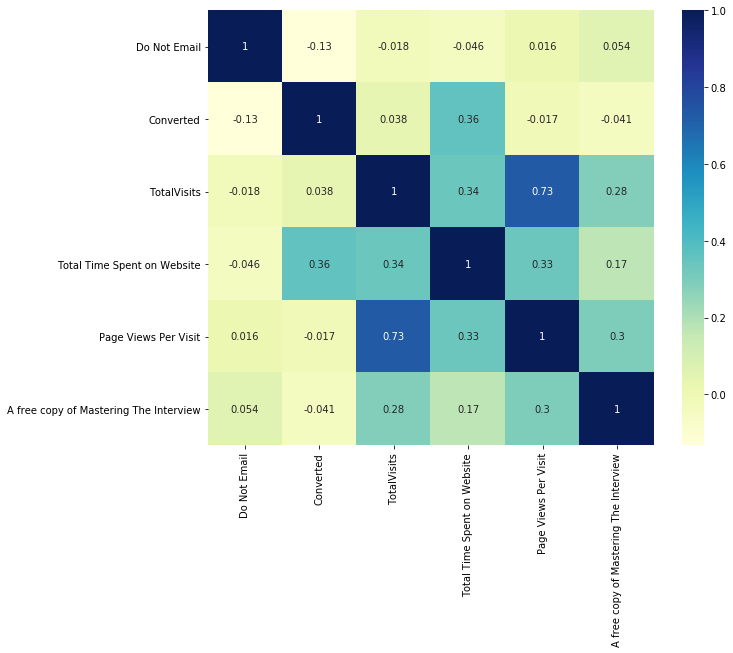

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(Leads_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

We observe Page views per visit and Total Views are positively correlated strongly. It reflects the actual scenario - When prospects view websites more, they view more pages each time as they want to understand maximum info about the types of courses, universities affiliated, placements, fees etc.

## Step 4: Data Preparation

### Creating dummy variables

In [47]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'Lead_Origin_X'
# Let's drop the first column from Leads_data df using 'drop_first = True'
# This is because n columns can be identified from n-1 variables

Lead_Origin_X = pd.get_dummies(Leads_data['Lead Origin'],drop_first = True,prefix='Lead_Origin')
Leads_data = pd.concat([Leads_data, Lead_Origin_X], axis = 1)

# Similarly creating dummies for "Lead Source" variable
Lead_Source_X = pd.get_dummies(Leads_data['Lead Source'],drop_first = True, prefix='Lead_Source')
Leads_data = pd.concat([Leads_data,Lead_Source_X], axis = 1)

# Similarly creating dummies for "Specialization"

Specialization_X = pd.get_dummies(Leads_data['Specialization'],drop_first = True, prefix='Specialization')
Leads_data = pd.concat([Leads_data,Specialization_X], axis = 1)

# Similarly creating dummies for "What is your current occupation" 

Current_Occupation_X = pd.get_dummies(Leads_data['What is your current occupation'],drop_first = True, prefix='Current_Occupation')
Leads_data = pd.concat([Leads_data,Current_Occupation_X], axis = 1)


In [48]:
# Drop 'Lead Origin' , 'Lead Source' , 'Specialization' and 'What is your current occupation' as we have created the dummies for it
Leads_data.drop(['Lead Origin'], axis = 1, inplace = True)
Leads_data.drop(['Lead Source'], axis = 1, inplace = True)
Leads_data.drop(['Specialization'], axis = 1, inplace = True)
Leads_data.drop(['What is your current occupation'], axis = 1, inplace = True)

In [49]:
Leads_data.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Form/Import,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Specialization_Business Administration,Specialization_Finance Management,Specialization_Fresher,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Unemployed,Current_Occupation_Working Professional
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,0.077749,0.385092,3.041644,483.133016,2.196036,0.305682,0.522317,0.085613,0.316646,0.193931,0.118396,0.037324,0.059032,0.043416,0.105881,0.371248,0.011961,0.090708,0.039539,0.091040,0.021708,0.054823,0.075977,0.037213,0.020822,0.897442,0.076310
std,0.267792,0.486644,2.826553,547.420675,1.843445,0.460721,0.499529,0.279807,0.465194,0.395397,0.323095,0.189565,0.235698,0.203802,0.307702,0.483165,0.108718,0.287209,0.194885,0.287682,0.145736,0.227648,0.264977,0.189295,0.142795,0.303398,0.265508
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,3.000000,245.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,4.000000,929.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,16.000000,2272.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9029 non-null   int64  
 1   Converted                                 9029 non-null   int64  
 2   TotalVisits                               9029 non-null   float64
 3   Total Time Spent on Website               9029 non-null   int64  
 4   Page Views Per Visit                      9029 non-null   float64
 5   A free copy of Mastering The Interview    9029 non-null   int64  
 6   Lead_Origin_Landing Page Submission       9029 non-null   uint8  
 7   Lead_Origin_Lead Form/Import              9029 non-null   uint8  
 8   Lead_Source_Google                        9029 non-null   uint8  
 9   Lead_Source_Olark Chat                    9029 non-null   uint8  
 10  Lead_Source_Organic Search          

#### Converted column is the target columnn hence assign it to y

In [51]:
y=Leads_data['Converted']

In [52]:
X= Leads_data.drop('Converted',axis=1)

### Splitting the Data into Training and Testing Sets

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [54]:
print('X_train :',X_train.shape,' y_train :',y_train.shape)
print('X_test :',X_test.shape, ' y_test :',y_test.shape)

X_train : (6320, 26)  y_train : (6320,)
X_test : (2709, 26)  y_test : (2709,)


### Rescaling the Features

In [55]:
scaler=StandardScaler()
cols=['Total Time Spent on Website','TotalVisits','Page Views Per Visit']
X_train[cols]=scaler.fit_transform(X_train[cols])

In [56]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Form/Import,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Specialization_Business Administration,Specialization_Finance Management,Specialization_Fresher,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Unemployed,Current_Occupation_Working Professional
count,6320.000000,6.320000e+03,6.320000e+03,6.320000e+03,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000
mean,0.078006,5.995556e-17,5.793537e-17,-1.449877e-16,0.306487,0.527690,0.082437,0.316139,0.193513,0.118354,0.037184,0.055063,0.042563,0.108228,0.371994,0.012342,0.089399,0.037342,0.095728,0.021203,0.052057,0.077848,0.036867,0.022627,0.899051,0.075158
std,0.268203,1.000079e+00,1.000079e+00,1.000079e+00,0.461071,0.499272,0.275051,0.465005,0.395083,0.323053,0.189226,0.228122,0.201886,0.310693,0.483375,0.110415,0.285341,0.189613,0.294241,0.144070,0.222160,0.267954,0.188450,0.148722,0.301286,0.263667
min,0.000000,-1.077771e+00,-8.843163e-01,-1.197064e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-1.077771e+00,-8.664247e-01,-1.197064e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,-2.352046e-02,-4.439084e-01,-1.175385e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,3.278963e-01,8.112541e-01,4.222245e-01,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,4.544897e+00,3.284878e+00,3.121039e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 5: Building the model

#### We are going with Logistic regression model, as we have to focus on the classification of the leads that is going to be converted or not.

In [57]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6293
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2986.1
Date:                Mon, 17 May 2021   Deviance:                       5972.2
Time:                        20:32:53   Pearson chi2:                 8.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.2214      0.297      0.744      0.457      -0.361       0.804
Do Not Email                                -1.0561      0.152     -6.967      0.000      -1.353      -0.759
TotalVisits                                  0.1773      0.047      3.754      0.000       0.085       0.270
Total Time Spent on Website                  1.0587      0.038     27.842      0.000       0.984       1.133
Page Views Per Visit                        -0.0415      0.054     -0.772      0.440      -0.147       0.064
A free copy of Mastering The Interview      -0.1311      0.103     -1.272      0.203      -0.333       0.071
Lead_Origin_Landing Page Submission         -0.7940      0.130     -6.127      0.000      -1.048      -0.540
Lead_Origin_Lead Form/Import                 3.7056      0.303     12.244      0.000       3.112       4.299
Lead_Source_Google                           0.1908      0.107      1.785      0.074      -0.019       0.400
Lead_Source_Olark Chat                       1.0829      0.151      7.149      0.000       0.786       1.380
Lead_Source_Organic Search                   0.1152      0.124      0.933      0.351      -0.127       0.357
Lead_Source_Others                          -0.2546      0.270     -0.943      0.346      -0.784       0.275
Lead_Source_Reference                        0.0124      0.369      0.034      0.973      -0.710       0.735
Specialization_Business Administration      -0.3329      0.234     -1.421      0.155      -0.792       0.126
Specialization_Finance Management           -0.4698      0.203     -2.317      0.021      -0.867      -0.072
Specialization_Fresher                      -1.4963      0.209     -7.168      0.000      -1.905      -1.087
Specialization_Hospitality Management       -0.9786      0.349     -2.808      0.005      -1.662      -0.295
Specialization_Human Resource Management    -0.2737      0.207     -1.324      0.186      -0.679       0.132
Specialization_IT Projects Management       -0.4446      0.247     -1.802      0.072      -0.928       0.039
Specialization_Marketing Management         -0.2601      0.205     -1.267      0.205      -0.662       0.142
Specialization_Media and Advertising        -0.6143      0.280     -2.193      0.028      -1.163      -0.065
Specialization_Operations Management        -0.2667      0.227     -1.174      0.240      -0.712       0.179
Specialization_Others                       -0.3195      0.211     -1.513      0.130      -0.733       0.094
Specialization_Supply Chain Management      -0.5364      0.245     -2.191      0.028      -1.016      -0.056
Specialization_Travel and Tourism           -0.6159      0.282     -2.185      0.029      -1.168      -0.064
Current_Occupation_Unemployed  

In [58]:
#### Running RFE with the output number of the variable equal to 18
logreg = LogisticRegression()
rfe = RFE(logreg, 18)          
rfe = rfe.fit(X_train, y_train)

In [59]:
list(X_train.columns[rfe.support_])

['Do Not Email',
 'TotalVisits',
 'Total Time Spent on Website',
 'A free copy of Mastering The Interview',
 'Lead_Origin_Landing Page Submission',
 'Lead_Origin_Lead Form/Import',
 'Lead_Source_Google',
 'Lead_Source_Olark Chat',
 'Lead_Source_Reference',
 'Specialization_Finance Management',
 'Specialization_Fresher',
 'Specialization_Hospitality Management',
 'Specialization_IT Projects Management',
 'Specialization_Media and Advertising',
 'Specialization_Supply Chain Management',
 'Specialization_Travel and Tourism',
 'Current_Occupation_Unemployed',
 'Current_Occupation_Working Professional']

In [60]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [61]:
def build_model(X,y):
    X = sm.add_constant(X)
    logm2 = sm.GLM(y,X, family = sm.families.Binomial())
    res = logm2.fit()
    print(res.summary())
    return X

def checkVIF(dataset):
    col=['const']
    dataset = dataset.drop([x for x in col if x in dataset.columns], axis=1)
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [62]:
X_train_model = build_model(X_train_rfe,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2988.7
Date:                Mon, 17 May 2021   Deviance:                       5977.4
Time:                        20:32:55   Pearson chi2:                 8.59e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [63]:
checkVIF(X_train_model)

,Features,VIF
16,Current_Occupation_Unemployed,12.59
4,Lead_Origin_Landing Page Submission,6.38
10,Specialization_Fresher,4.27
5,Lead_Origin_Lead Form/Import,3.74
8,Lead_Source_Reference,3.24
3,A free copy of Mastering The Interview,2.93
7,Lead_Source_Olark Chat,2.90
6,Lead_Source_Google,2.43
17,Current_Occupation_Working Professional,1.85
1,TotalVisits,1.63


#### 'Current_Occupation_Unemployed' has high p value and high VIF, so we drop the column & rebuild the model

In [64]:
X_train_model = X_train_model.drop(["Current_Occupation_Unemployed"], axis = 1)

In [65]:
X_train_model = build_model(X_train_model,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2989.1
Date:                Mon, 17 May 2021   Deviance:                       5978.2
Time:                        20:32:55   Pearson chi2:                 8.61e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [66]:
checkVIF(X_train_model)

,Features,VIF
4,Lead_Origin_Landing Page Submission,3.69
5,Lead_Origin_Lead Form/Import,3.49
8,Lead_Source_Reference,3.19
3,A free copy of Mastering The Interview,2.63
10,Specialization_Fresher,2.34
7,Lead_Source_Olark Chat,2.29
6,Lead_Source_Google,1.93
1,TotalVisits,1.60
2,Total Time Spent on Website,1.27
9,Specialization_Finance Management,1.25


#### We see 'Specialization_IT Projects Management' has high p value, hence we drop this column 

In [67]:
X_train_model = X_train_model.drop(["Specialization_IT Projects Management"], axis = 1)

In [68]:
X_train_model = build_model(X_train_model,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2989.6
Date:                Mon, 17 May 2021   Deviance:                       5979.2
Time:                        20:32:56   Pearson chi2:                 8.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [69]:
checkVIF(X_train_model)

,Features,VIF
4,Lead_Origin_Landing Page Submission,3.64
5,Lead_Origin_Lead Form/Import,3.49
8,Lead_Source_Reference,3.18
3,A free copy of Mastering The Interview,2.62
10,Specialization_Fresher,2.33
7,Lead_Source_Olark Chat,2.29
6,Lead_Source_Google,1.93
1,TotalVisits,1.60
2,Total Time Spent on Website,1.27
9,Specialization_Finance Management,1.23


#### We see 'Lead_Source_Reference' has high p value, hence we drop this column 

In [70]:
X_train_model = X_train_model.drop(["Lead_Source_Reference"], axis = 1)

In [71]:
X_train_model = build_model(X_train_model,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2990.0
Date:                Mon, 17 May 2021   Deviance:                       5979.9
Time:                        20:32:56   Pearson chi2:                 8.36e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [72]:
checkVIF(X_train_model)

,Features,VIF
4,Lead_Origin_Landing Page Submission,3.63
3,A free copy of Mastering The Interview,2.62
9,Specialization_Fresher,2.29
7,Lead_Source_Olark Chat,2.27
6,Lead_Source_Google,1.93
1,TotalVisits,1.60
5,Lead_Origin_Lead Form/Import,1.37
2,Total Time Spent on Website,1.27
8,Specialization_Finance Management,1.23
14,Current_Occupation_Working Professional,1.16


#### We see 'A free copy of Mastering The Interview' has high p value, hence we drop this column 

In [73]:
X_train_model = X_train_model.drop(["A free copy of Mastering The Interview"], axis = 1)

In [74]:
X_train_model = build_model(X_train_model,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2990.9
Date:                Mon, 17 May 2021   Deviance:                       5981.7
Time:                        20:32:57   Pearson chi2:                 8.31e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [75]:
checkVIF(X_train_model)

,Features,VIF
6,Lead_Source_Olark Chat,2.27
8,Specialization_Fresher,2.25
3,Lead_Origin_Landing Page Submission,1.85
1,TotalVisits,1.60
5,Lead_Source_Google,1.59
4,Lead_Origin_Lead Form/Import,1.37
2,Total Time Spent on Website,1.26
7,Specialization_Finance Management,1.23
13,Current_Occupation_Working Professional,1.16
0,Do Not Email,1.11


#### We see 'Specialization_Media and Advertising' has high p value, hence we drop this column 

In [76]:
X_train_model = X_train_model.drop(["Specialization_Media and Advertising"], axis = 1)

In [77]:
X_train_model = build_model(X_train_model,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2992.0
Date:                Mon, 17 May 2021   Deviance:                       5984.0
Time:                        20:32:57   Pearson chi2:                 8.28e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [78]:
checkVIF(X_train_model)

,Features,VIF
6,Lead_Source_Olark Chat,2.27
8,Specialization_Fresher,2.25
3,Lead_Origin_Landing Page Submission,1.81
1,TotalVisits,1.59
5,Lead_Source_Google,1.59
4,Lead_Origin_Lead Form/Import,1.37
2,Total Time Spent on Website,1.26
7,Specialization_Finance Management,1.22
12,Current_Occupation_Working Professional,1.15
0,Do Not Email,1.11


#### We see 'Specialization_Supply Chain Management' has high p value, hence we drop this column 

In [79]:
X_train_model = X_train_model.drop(["Specialization_Supply Chain Management"], axis = 1)

In [80]:
X_train_model = build_model(X_train_model,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2993.0
Date:                Mon, 17 May 2021   Deviance:                       5986.0
Time:                        20:32:57   Pearson chi2:                 8.23e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [81]:
checkVIF(X_train_model)

,Features,VIF
6,Lead_Source_Olark Chat,2.26
8,Specialization_Fresher,2.25
3,Lead_Origin_Landing Page Submission,1.73
1,TotalVisits,1.59
5,Lead_Source_Google,1.59
4,Lead_Origin_Lead Form/Import,1.37
2,Total Time Spent on Website,1.26
7,Specialization_Finance Management,1.21
11,Current_Occupation_Working Professional,1.15
0,Do Not Email,1.11


#### We see 'Specialization_Travel and Tourism' has high p value, hence we drop this column 

In [82]:
X_train_model = X_train_model.drop(["Specialization_Travel and Tourism"], axis = 1)

In [83]:
X_train_model = build_model(X_train_model,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2993.9
Date:                Mon, 17 May 2021   Deviance:                       5987.9
Time:                        20:32:58   Pearson chi2:                 8.21e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [84]:
checkVIF(X_train_model)

,Features,VIF
6,Lead_Source_Olark Chat,2.26
8,Specialization_Fresher,2.25
3,Lead_Origin_Landing Page Submission,1.69
1,TotalVisits,1.59
5,Lead_Source_Google,1.59
4,Lead_Origin_Lead Form/Import,1.36
2,Total Time Spent on Website,1.26
7,Specialization_Finance Management,1.20
10,Current_Occupation_Working Professional,1.15
0,Do Not Email,1.11


#### We see 'Specialization_Finance Management' has high p value, hence we drop this column 

In [85]:
X_train_model = X_train_model.drop(["Specialization_Finance Management"], axis = 1)

In [86]:
X_train_model = build_model(X_train_model,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2994.8
Date:                Mon, 17 May 2021   Deviance:                       5989.5
Time:                        20:32:58   Pearson chi2:                 8.17e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [87]:
checkVIF(X_train_model)

,Features,VIF
6,Lead_Source_Olark Chat,2.23
7,Specialization_Fresher,2.22
1,TotalVisits,1.59
3,Lead_Origin_Landing Page Submission,1.57
5,Lead_Source_Google,1.57
4,Lead_Origin_Lead Form/Import,1.34
2,Total Time Spent on Website,1.26
9,Current_Occupation_Working Professional,1.15
0,Do Not Email,1.11
8,Specialization_Hospitality Management,1.02


### All variables now are within acceptable range in terms of p-value and VIF. So we go ahead and make our predictions using this model only.

## Step 6: Making Predictions Using the Final Model

In [88]:
X = sm.add_constant(X_train_model)
y=y_train
logm2 = sm.GLM(y,X, family = sm.families.Binomial())
res = logm2.fit()

### Creating Predict on training dataset

In [89]:
y_train_pred = res.predict(X)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.11954353, 0.09779688, 0.06008343, 0.1913817 , 0.49171155,
       0.1913817 , 0.1913817 , 0.17540102, 0.27937245, 0.12326354])

In [90]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index

### Creating 'predicted' column based on 'Converted_Prob' value >0.5

In [91]:
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.5 else 0)

In [92]:
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,predicted
0,0,0.119544,5493,0
1,0,0.097797,8064,0
2,0,0.060083,4716,0
3,0,0.191382,9117,0
4,1,0.491712,2402,0


In [93]:
def confusionMatrix(x,y):  
    matrixName=metrics.confusion_matrix(x,y)
    print(matrixName)
    print()
    TP = matrixName[1,1] # true positive 
    TN = matrixName[0,0] # true negatives
    FP = matrixName[0,1] # false positives
    FN = matrixName[1,0] # false negatives
    matrix={"TP": TP,"TN":TN,"FP":FP,"FN":FN}
    print()
    print(matrix)
    print("Sensitivity is : ",round(TP / float(TP+FN),3))
    print("Specificity is : ",round(TN / float(TN+FP),3))
    print("False Postive Rate is :",round(FP/ float(TN+FP),3))
    print("Positive predictive value is : ",round(TP / float(TP+FP),3))
    print("Negative predictive value is : ",round(TN / float(TN+ FN),3))
    print("Accuracy Score is : ",round(metrics.accuracy_score(x,y),3))
    print("Precision Score is : ",round(precision_score(x,y),3))
    print("Recall Value is : ",round(recall_score(x,y),3))    

### Creating confusion matrix and related values using the y_train_pred_final

In [94]:
confusionMatrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

[[3414  495]
 [ 867 1544]]


{'TP': 1544, 'TN': 3414, 'FP': 495, 'FN': 867}
Sensitivity is :  0.64
Specificity is :  0.873
False Postive Rate is : 0.127
Positive predictive value is :  0.757
Negative predictive value is :  0.797
Accuracy Score is :  0.784
Precision Score is :  0.757
Recall Value is :  0.64


### Drawing ROC curve for the Training Dataset

In [95]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    return None

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'], drop_intermediate = False )

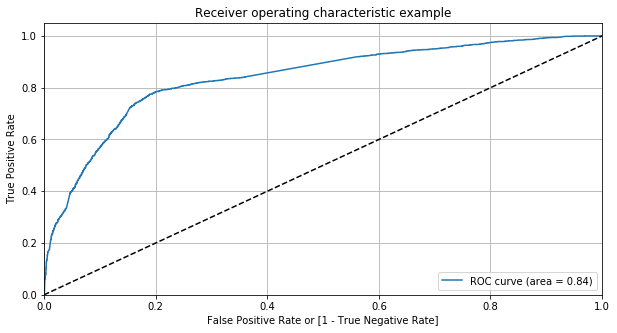

In [97]:
draw_roc(y_train_pred_final['Converted'],y_train_pred_final['Converted_Prob'])

### Creating columns with different probability cutoffs 

In [98]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.119544,5493,0,1,1,0,0,0,0,0,0,0,0
1,0,0.097797,8064,0,1,0,0,0,0,0,0,0,0,0
2,0,0.060083,4716,0,1,0,0,0,0,0,0,0,0,0
3,0,0.191382,9117,0,1,1,0,0,0,0,0,0,0,0
4,1,0.491712,2402,0,1,1,1,1,1,0,0,0,0,0


### Calculate accuracy sensitivity & specificity for various probability cutoffs

In [99]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.443829  0.991705  0.105909
0.2   0.2  0.730854  0.835753  0.666155
0.3   0.3  0.793987  0.783907  0.800205
0.4   0.4  0.798101  0.731647  0.839089
0.5   0.5  0.784494  0.640398  0.873369
0.6   0.6  0.768671  0.539610  0.909951
0.7   0.7  0.747310  0.433430  0.940906
0.8   0.8  0.711551  0.284114  0.975185
0.9   0.9  0.691930  0.211945  0.987976


### Plot accuracy,sensitivity & specificity for various probabilities

<Figure size 720x360 with 0 Axes>

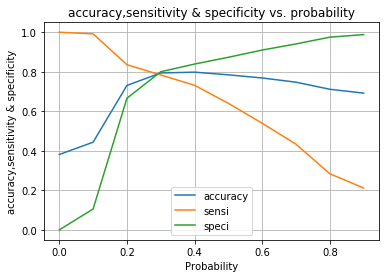

In [100]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(10, 5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('accuracy,sensitivity & specificity vs. probability')
plt.xlabel('Probability')
plt.ylabel('accuracy,sensitivity & specificity')
plt.legend()
plt.grid()
plt.show()

### Creating 'predicted' column based on 'Converted_Prob' value >0.25

In [101]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.25 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.119544,5493,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.097797,8064,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.060083,4716,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.191382,9117,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.491712,2402,0,1,1,1,1,1,0,0,0,0,0,1


### Creating confusion matrix and related values using y_train_pred_final

In [102]:
confusionMatrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

[[2946  963]
 [ 469 1942]]


{'TP': 1942, 'TN': 2946, 'FP': 963, 'FN': 469}
Sensitivity is :  0.805
Specificity is :  0.754
False Postive Rate is : 0.246
Positive predictive value is :  0.669
Negative predictive value is :  0.863
Accuracy Score is :  0.773
Precision Score is :  0.669
Recall Value is :  0.805


In [103]:
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

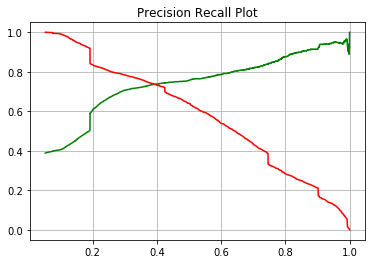

In [104]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title("Precision Recall Plot")
plt.grid()
plt.show()

## Step 7: Model Evaluation    

### Rescaling the Features of test data set

In [105]:
cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[cols]=scaler.fit_transform(X_test[cols])

In [106]:
final_col=X_train_model.drop('const',axis=1)

In [107]:
X_test=X_test[final_col.columns]

In [108]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4664    0.192415
5394    0.562698
1595    0.939473
2111    0.293026
9182    0.192415
1055    0.421291
541     0.188469
446     0.991677
3728    0.109016
4249    0.065723
dtype: float64

In [109]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

In [110]:
y_test_df['Prospect ID'] = y_test_df.index

In [111]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [112]:
y_test_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [113]:
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [114]:
y_test_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,4664,0.192415
1,0,5394,0.562698
2,1,1595,0.939473
3,0,2111,0.293026
4,0,9182,0.192415


In [115]:
y_test_pred_final = y_test_pred_final[['Prospect ID','Converted','Converted_prob']]
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map( lambda x: round(x*100))

### Creating 'final_predicted' column based on 'Converted_Prob' value >0.25

In [116]:
y_test_pred_final['final_Predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

In [117]:
y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4664,0,0.192415,19,0
1,5394,0,0.562698,56,1
2,1595,1,0.939473,94,1
3,2111,0,0.293026,29,1
4,9182,0,0.192415,19,0


### Creating Confusion matrix for the test Data

In [118]:
confusionMatrix(y_test_pred_final['Converted'], y_test_pred_final['final_Predicted'])

[[1244  399]
 [ 197  869]]


{'TP': 869, 'TN': 1244, 'FP': 399, 'FN': 197}
Sensitivity is :  0.815
Specificity is :  0.757
False Postive Rate is : 0.243
Positive predictive value is :  0.685
Negative predictive value is :  0.863
Accuracy Score is :  0.78
Precision Score is :  0.685
Recall Value is :  0.815


### Creating confusion matrix and related values using y_train_pred_final

In [119]:
confusionMatrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

[[2946  963]
 [ 469 1942]]


{'TP': 1942, 'TN': 2946, 'FP': 963, 'FN': 469}
Sensitivity is :  0.805
Specificity is :  0.754
False Postive Rate is : 0.246
Positive predictive value is :  0.669
Negative predictive value is :  0.863
Accuracy Score is :  0.773
Precision Score is :  0.669
Recall Value is :  0.805


# Recommendations

#### Top features which are recommended by model as factors leading to Hot Leads are -
    1.) Lead_Origin_Lead Form/Import
    2.) Current_Occupation_Working Professional
    3.) Lead_Source_Olark Chat
    4.) Total Time Spent on Website
#### Features which are indicators of Leads not getting converted are -
    1.) Do Not Email
    2.) Specialization_Fresher
    3.) Specialization_Hospitality Management
    4.) Lead_Origin_Landing Page Submission

# Insights

1.) Leads whose origin is either Lead Add Form or Lead Import are good leads.
    Marketting spends can be increased on these 2 lead origins to increase revenues for the company as these leads are likely to buy the courses.
   
2.) Lead prospects who are working professionals are good leads. Salesperson should concentrate more on such insividuals. They should explain all benefits of joining these courses to these working professionals when they call them later.

3.) X education should also try to make the website even more informative and interesting for prospects. This is because prospects who spend more time on website lead to buying the courses.

4.) Sales professionals should not invest way too much time on Prospects who mark 'Do not email" as they are most unlikely to buy a course.

5.) Prospects which do not select specialisation are Freshers. These are not buying courses that easily. Company should look into having more fresher-friendly & fresher relevant courses which could motivate freshers to take courses from X education.

6.) Prospects who have specialisation in Hospitality Management are least likely to be hot Leads. X education not having Hospitality relevant courses on the website could be the reason for it. This should be worked upon by management. Till then, not much use of putting too much efforts by sales team on such prospects.
